In [33]:
# loading dataset
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np

cancer_dataset = load_breast_cancer()
df = pd.DataFrame(data=cancer_dataset.data, columns=cancer_dataset.feature_names)
df['target'] = cancer_dataset.target

In [34]:
# getting general dataset information
print(f'num of features: {len(cancer_dataset.feature_names)}\nnum of classes: {len(set(cancer_dataset.target))}\nnum of samples: {df.shape[0]}')

num of features: 30
num of classes: 2
num of samples: 569


In [35]:
# splitting the dataset
from sklearn.model_selection import train_test_split

dfX = df.drop(columns=['target'])
dfY = df['target']
xTrain, xTest, yTrain, yTest = train_test_split(dfX, dfY, test_size=.2, random_state=42)

In [36]:
# scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(xTrain)
xTrainScaled = scaler.transform(xTrain)
xTestScaled = scaler.transform(xTest)

,MODEL,HYPERPARAMETER,ACCURACY,PRECISION,RECALL,F1
0,knn,{'n_neighbors': np.int64(1)},0.9407,0.9423,0.9651,0.9534
0,knn,{'n_neighbors': np.int64(2)},0.9473,0.9684,0.9475,0.9577
0,knn,{'n_neighbors': np.int64(3)},0.9604,0.9536,0.9861,0.9693
0,knn,{'n_neighbors': np.int64(4)},0.9626,0.9630,0.9791,0.9707
0,knn,{'n_neighbors': np.int64(5)},0.9604,0.9506,0.9896,0.9694
0,knn,{'n_neighbors': np.int64(6)},0.9626,0.9571,0.9861,0.9710
0,knn,{'n_neighbors': np.int64(7)},0.9604,0.9509,0.9896,0.9695
0,knn,{'n_neighbors': np.int64(8)},0.9670,0.9633,0.9861,0.9742
0,knn,{'n_neighbors': np.int64(9)},0.9538,0.9380,0.9930,0.9645


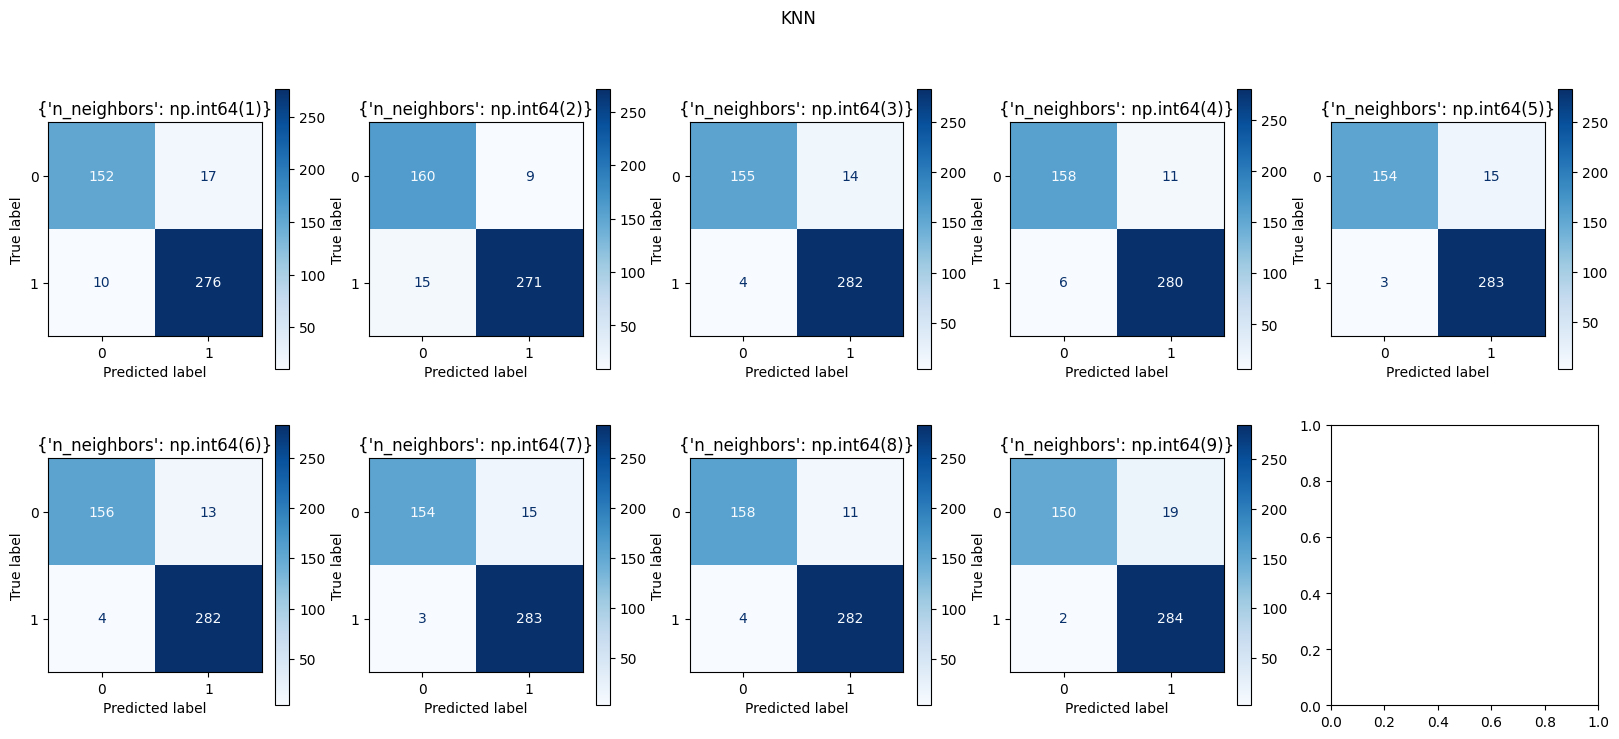

In [37]:
# optimizing knn n_neighbors hyperparameter
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, cross_val_predict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

knn = KNeighborsClassifier()
params = {'n_neighbors':np.arange(1, 10, 1)}
gridSearchKnn = GridSearchCV(knn, params, scoring=['accuracy', 'precision', 'recall', 'f1'],  refit='recall')
gridSearchKnn.fit(xTrainScaled, yTrain)

# setting up subplots
fig, axes = plt.subplots(2, 5, figsize=(20,8))
axes = axes.flatten()

# setting title for figure
fig.suptitle('KNN')

# setting up data frame for tabular model information
model_assesment = pd.DataFrame()

# getting scores
results = gridSearchKnn.cv_results_
for i in range(len(results['params'])):

    # getting model information/performance
    params = results['params'][i]
    accuracy = results['mean_test_accuracy'][i]
    precision = results['mean_test_precision'][i]
    recall = results['mean_test_recall'][i]
    f1 = results['mean_test_f1'][i]
    model_performance = pd.DataFrame([{'MODEL': 'knn', 'HYPERPARAMETER': f'{params:}', 'ACCURACY': f'{accuracy:.4f}', 'PRECISION': f'{precision:.4f}', 'RECALL': f'{recall:.4f}', 'F1': f'{f1:.4f}'}])

    # appending information/performance to dataframe
    model_assesment = pd.concat([model_assesment, model_performance])

    # generating confusion matrix
    model = KNeighborsClassifier(**results['params'][i])
    yPred = cross_val_predict(model, xTrainScaled, yTrain)
    confusionMatrix = confusion_matrix(yTrain, yPred)
    confusionMatrixDisplay = ConfusionMatrixDisplay(confusion_matrix=confusionMatrix)
    confusionMatrixDisplay.plot(ax=axes[i], cmap='Blues')
    axes[i].set_title(f"{params}")
first_model_assessment = model_assesment
first_model_assessment.head(n=model_assesment.shape[0])


,MODEL,HYPERPARAMETER,ACCURACY,PRECISION,RECALL,F1
0,knn,{'n_neighbors': np.int64(1)},0.9407,0.9423,0.9651,0.9534
0,knn,{'n_neighbors': np.int64(2)},0.9473,0.9684,0.9475,0.9577
0,knn,{'n_neighbors': np.int64(3)},0.9604,0.9536,0.9861,0.9693
0,knn,{'n_neighbors': np.int64(4)},0.9626,0.9630,0.9791,0.9707
0,knn,{'n_neighbors': np.int64(5)},0.9604,0.9506,0.9896,0.9694
0,knn,{'n_neighbors': np.int64(6)},0.9626,0.9571,0.9861,0.9710
0,knn,{'n_neighbors': np.int64(7)},0.9604,0.9509,0.9896,0.9695
0,knn,{'n_neighbors': np.int64(8)},0.9670,0.9633,0.9861,0.9742
0,knn,{'n_neighbors': np.int64(9)},0.9538,0.9380,0.9930,0.9645
0,decision tree,{'max_depth': np.int64(1)},0.8879,0.9058,0.9231,0.9125


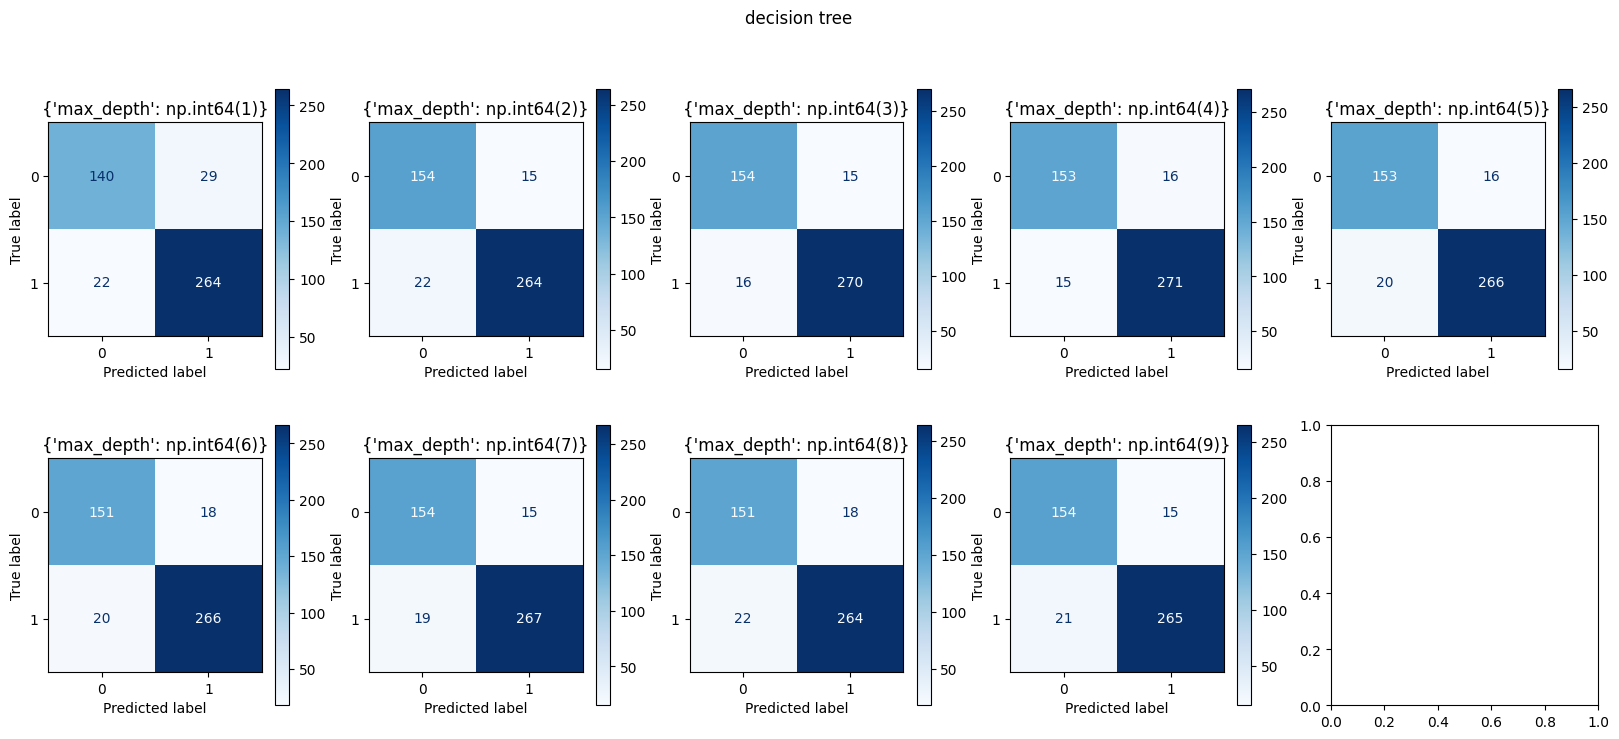

In [38]:
# optimizing decision tree max_depth hyperparameters
from sklearn.tree import DecisionTreeClassifier
decisionTree = DecisionTreeClassifier()

params = {'max_depth': np.arange(1, 10, 1)}
gridSearchDecisionTree = GridSearchCV(decisionTree, params, scoring=['accuracy', 'precision', 'recall', 'f1'],  refit='recall')
gridSearchDecisionTree.fit(xTrainScaled, yTrain)

# setting up subplot
fig, axes = plt.subplots(2,5, figsize=(20, 8))
axes=axes.flatten()

# setting title for figure
fig.suptitle('decision tree')

# getting scores
results = gridSearchDecisionTree.cv_results_
for i in range(len(results['params'])):
    # getting model information/performance
    params = results['params'][i]
    accuracy = results['mean_test_accuracy'][i]
    precision = results['mean_test_precision'][i]
    recall = results['mean_test_recall'][i]
    f1 = results['mean_test_f1'][i]
    model_performance = pd.DataFrame([{'MODEL': 'decision tree', 'HYPERPARAMETER': f'{params}', 'ACCURACY': f'{accuracy:.4f}', 'PRECISION': f'{precision:.4f}', 'RECALL': f'{recall:.4f}', 'F1': f'{f1:.4f}'}])

    # appending information/performance to dataframe
    model_assesment = pd.concat([model_assesment, model_performance])

    # generating confusion matrix
    model = DecisionTreeClassifier(**results['params'][i])
    yPred = cross_val_predict(model, xTrainScaled, yTrain)
    confusionMatrix = confusion_matrix(yTrain, yPred)
    confusionMatrixDisplay = ConfusionMatrixDisplay(confusion_matrix=confusionMatrix)
    confusionMatrixDisplay.plot(ax=axes[i], cmap='Blues')
    axes[i].set_title(f"{params}")
second_model_assesment = model_assesment
second_model_assesment.head(n=model_assesment.shape[0])

,MODEL,HYPERPARAMETER,ACCURACY,PRECISION,RECALL,F1
0,knn,{'n_neighbors': np.int64(1)},0.9407,0.9423,0.9651,0.9534
0,knn,{'n_neighbors': np.int64(2)},0.9473,0.9684,0.9475,0.9577
0,knn,{'n_neighbors': np.int64(3)},0.9604,0.9536,0.9861,0.9693
0,knn,{'n_neighbors': np.int64(4)},0.9626,0.9630,0.9791,0.9707
0,knn,{'n_neighbors': np.int64(5)},0.9604,0.9506,0.9896,0.9694
0,knn,{'n_neighbors': np.int64(6)},0.9626,0.9571,0.9861,0.9710
0,knn,{'n_neighbors': np.int64(7)},0.9604,0.9509,0.9896,0.9695
0,knn,{'n_neighbors': np.int64(8)},0.9670,0.9633,0.9861,0.9742
0,knn,{'n_neighbors': np.int64(9)},0.9538,0.9380,0.9930,0.9645
0,decision tree,{'max_depth': np.int64(1)},0.8879,0.9058,0.9231,0.9125


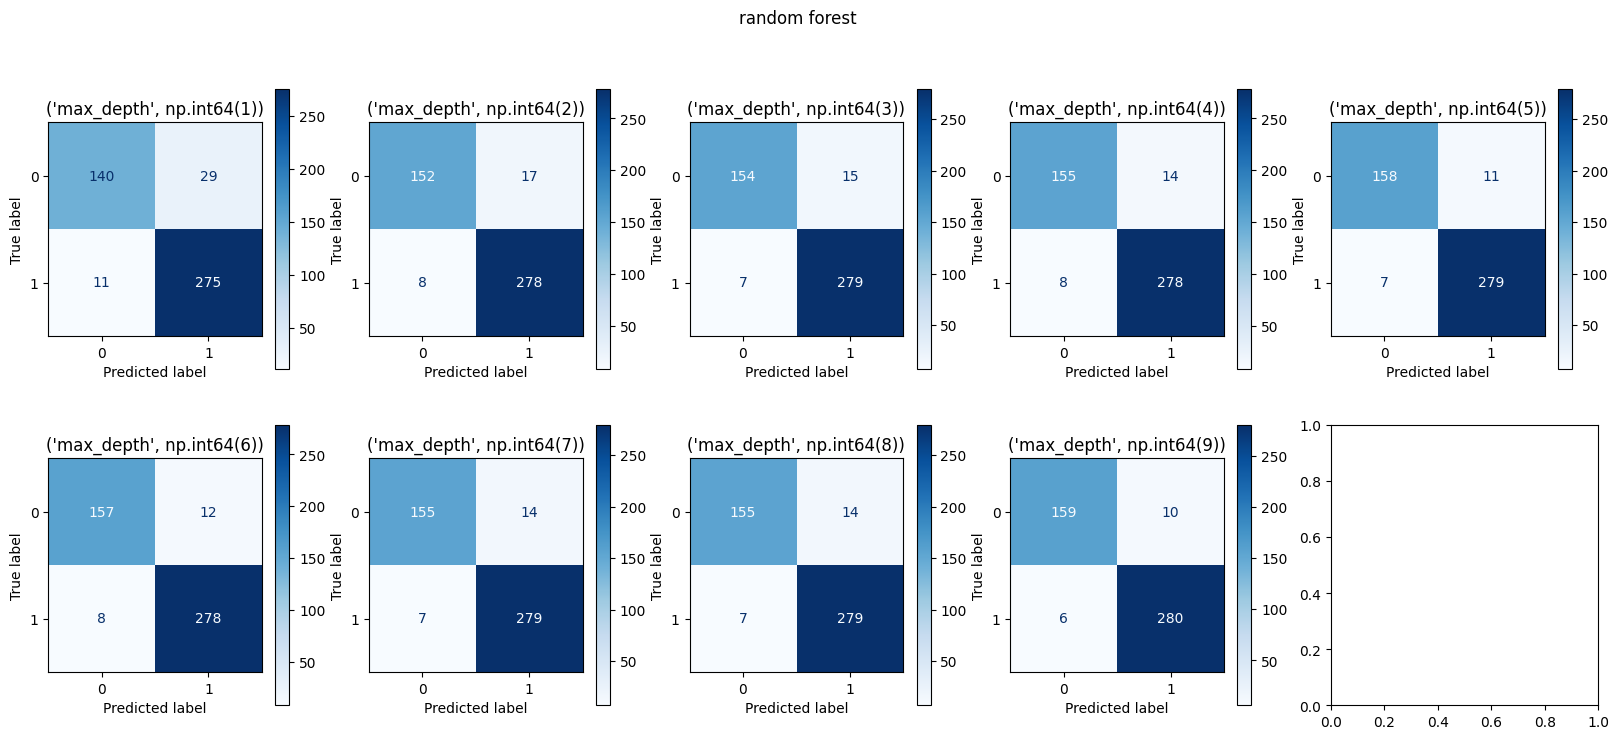

In [ ]:
# optimizing max_depth for random forest
from sklearn.ensemble import RandomForestClassifier
randomForest = RandomForestClassifier()
params ={'n_estimators': [100], 'max_depth': np.arange(1, 10, 1)}

gridSearchRandomForest = GridSearchCV(randomForest, params, scoring=['accuracy', 'precision', 'recall', 'f1'],  refit='recall')
gridSearchRandomForest.fit(xTrainScaled, yTrain)

# setting up subplot
fig, axes = plt.subplots(2, 5, figsize=(20,8))
axes = axes.flatten()

# setting title for figure
fig.suptitle('random forestS')

# getting scores
results = gridSearchRandomForest.cv_results_
for i in range(len(results['params'])):
    # getting model information/performance
    params = results['params'][i]
    accuracy = results['mean_test_accuracy'][i]
    precision = results['mean_test_precision'][i]
    recall = results['mean_test_recall'][i]
    f1 = results['mean_test_f1'][i]
    model_performance = pd.DataFrame([{'MODEL': 'random forest', 'HYPERPARAMETER': f'{params}', 'ACCURACY': f'{accuracy:.4f}', 'PRECISION': f'{precision:.4f}', 'RECALL': f'{recall:.4f}', 'F1': f'{f1:.4f}'}])

    # appending information/performance to dataframe
    model_assesment = pd.concat([model_assesment, model_performance])
    
    # generating confusion matrix
    model = RandomForestClassifier(**results['params'][i])
    yPred = cross_val_predict(model, xTrainScaled, yTrain)
    confusionMatrix = confusion_matrix(yTrain, yPred)
    confusionMatrixDisplay = ConfusionMatrixDisplay(confusion_matrix=confusionMatrix)
    confusionMatrixDisplay.plot(ax=axes[i], cmap='Blues')
    axes[i].set_title(f"{next(iter(params.items()))}")
third_model_assesment = model_assesment
third_model_assesment.head(n=model_assesment.shape[0])